In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy import stats

# import sys
# sys.path.append('/home/galina/PythonProjects/common_functions')
# import peptides as pep
%matplotlib inline

# sns.set_context('talk')
sns.set(font_scale = 1.5)

# Peptide data inspection

In [2]:
df = pd.read_csv('18 EP dIm and dR Signals.csv', header = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4125 entries, 0 to 4124
Data columns (total 23 columns):
Grid Index                              4125 non-null int64
Peptide                                 4125 non-null object
Peptide Length                          4125 non-null int64
Peptide Weight                          4125 non-null float64
dIm EP Peptide Readout                  4125 non-null float64
dIm EP Peptide Median                   4125 non-null float64
dIm EP Peptide MAD                      4125 non-null float64
dIm EP Streptavidin Readout             4125 non-null float64
dIm EP Streptavidin Median              4125 non-null float64
dIm EP Streptavidin MAD                 4125 non-null float64
dIm EP Bad                              4125 non-null bool
dR EP Peptide Readout                   4125 non-null float64
dR EP Peptide Median                    4125 non-null float64
dR EP Peptide MAD                       4125 non-null float64
dR EP Streptavidin Readout       

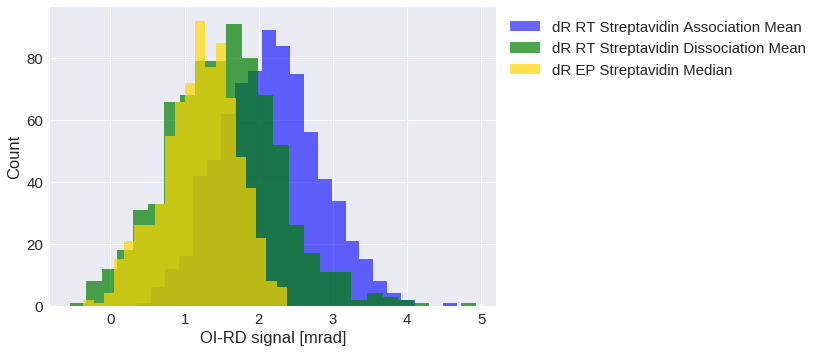

In [9]:
dR_to_dIm = 2.14
df_reacted = df[df['dR RT Streptavidin Association SNR'] > 2]
sns.distplot(df_reacted['dR RT Streptavidin Association Mean'] * dR_to_dIm * 1000,
             kde = False, norm_hist = False, # bins = 40,
             hist_kws={'histtype' : 'stepfilled', 'alpha': 0.6, 'color' : 'b'}, #sns.color_palette('Blues_r')[0]},
             label = 'dR RT Streptavidin Association Mean')
sns.distplot(df_reacted['dR RT Streptavidin Dissociation Mean'] * dR_to_dIm * 1000,
             kde = False, norm_hist = False, # bins = 40,
             hist_kws={'histtype' : 'stepfilled', 'alpha': 0.7, 'color' : 'g'}, #sns.color_palette('Blues_r')[1]})
            label = 'dR RT Streptavidin Dissociation Mean')
sns.distplot(df_reacted['dR EP Streptavidin Median'] * dR_to_dIm * 1000,
             kde = False, norm_hist = False, # bins = 40,
             hist_kws={'histtype' : 'stepfilled', 'alpha': 0.7, 'color' : 'gold'}, #sns.color_palette('Blues_r')[2]},
             label = 'dR EP Streptavidin Median')
             
# sns.distplot(df_reacted['dR RT Streptavidin Baseline Noise'] * dR_to_dIm * 1000,
#              kde = False, norm_hist = False, bins = 10,
#              hist_kws={'histtype' : 'stepfilled', 'alpha': 0.8})
# sns.distplot(df_reacted['dR EP Streptavidin Median'] * dR_to_dIm * 1000,
#              kde = False, norm_hist = False, # bins = 40,
#              hist_kws={'histtype' : 'stepfilled', 'alpha': 0.8})
# sns.distplot(df_reacted['dIm EP Streptavidin Median'] * 1000,
#              kde = False, norm_hist = False, # bins = 40,
#              hist_kws={'histtype' : 'stepfilled', 'alpha': 0.8})
             
plt.xlabel('OI-RD signal [mrad]')
plt.ylabel('Count')
# sns.distplot(df_reacted['dR RT Streptavidin Dissociation Mean'] * dR_to_dIm * 1000)
# sns.distplot(df_reacted['dIm EP Streptavidin Median'] * 1000)
plt.legend(bbox_to_anchor = (1,1))

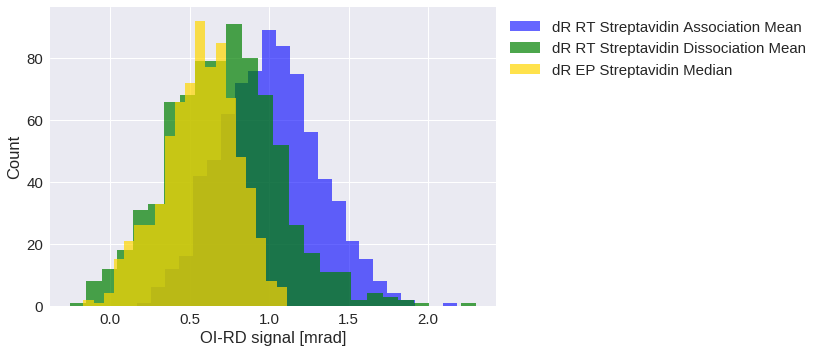

In [41]:
df_reacted = df[df['dR RT Streptavidin Association SNR'] > 2]
sns.distplot(df_reacted['dR RT Streptavidin Association Mean'] * 1000,
             kde = False, norm_hist = False, # bins = 40,
             hist_kws={'histtype' : 'stepfilled', 'alpha': 0.6, 'color' : 'b'}, #sns.color_palette('Blues_r')[0]},
             label = 'dR RT Streptavidin Association Mean')
sns.distplot(df_reacted['dR RT Streptavidin Dissociation Mean'] * 1000,
             kde = False, norm_hist = False, # bins = 40,
             hist_kws={'histtype' : 'stepfilled', 'alpha': 0.7, 'color' : 'g'}, #sns.color_palette('Blues_r')[1]})
            label = 'dR RT Streptavidin Dissociation Mean')
sns.distplot(df_reacted['dR EP Streptavidin Median'] * 1000,
             kde = False, norm_hist = False, # bins = 40,
             hist_kws={'histtype' : 'stepfilled', 'alpha': 0.7, 'color' : 'gold'}, #sns.color_palette('Blues_r')[2]},
             label = 'dR EP Streptavidin Median')

             
plt.xlabel('OI-RD signal [mrad]')
plt.ylabel('Count')

plt.legend(bbox_to_anchor = (1,1))

See **19 Compare dIm EP and dR EP** notebook for comparison of dIm EP and dR EP streptavidin signals. Last plot shows that $ \text{dIm} \approx 2.14 \times \text{dR} $.

In [40]:
mask = (df['Peptide Length'].isin([8, 9]) & (df['dR RT Streptavidin Association SNR'] > 2) )

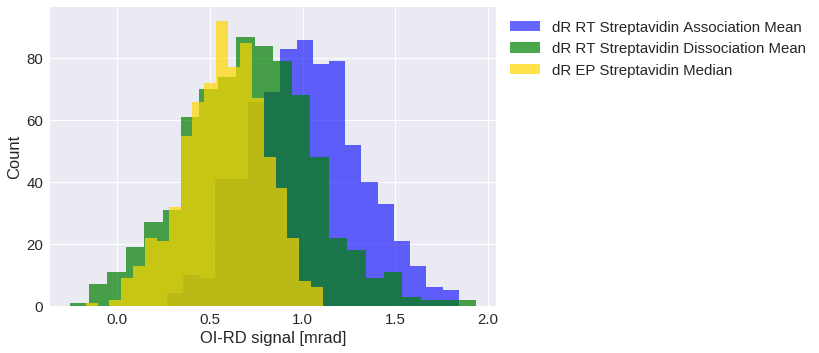

In [47]:
sns.distplot(df[mask]['dR RT Streptavidin Association Mean'] * 1000,
             kde = False, norm_hist = False, # bins = 40,
             hist_kws={'histtype' : 'stepfilled', 'alpha': 0.6, 'color' : 'b'}, #sns.color_palette('Blues_r')[0]},
             label = 'dR RT Streptavidin Association Mean')
sns.distplot(df[mask]['dR RT Streptavidin Dissociation Mean'] * 1000,
             kde = False, norm_hist = False, # bins = 40,
             hist_kws={'histtype' : 'stepfilled', 'alpha': 0.7, 'color' : 'g'}, #sns.color_palette('Blues_r')[1]})
             label = 'dR RT Streptavidin Dissociation Mean')
sns.distplot(df[mask]['dR EP Streptavidin Median'] * 1000,
             kde = False, norm_hist = False, # bins = 40,
             hist_kws={'histtype' : 'stepfilled', 'alpha': 0.7, 'color' : 'gold'}, #sns.color_palette('Blues_r')[2]},
             label = 'dR EP Streptavidin Median')

             
plt.xlabel('OI-RD signal [mrad]')
plt.ylabel('Count')

plt.legend(bbox_to_anchor = (1,1))

In [49]:
a = df[mask].sort_values('dR RT Streptavidin Association Mean', ascending = False)[[
    'Grid Index', 'Peptide', 'dR RT Streptavidin Association Mean']]
a['dR RT Streptavidin Association Mean'] = a['dR RT Streptavidin Association Mean'] * 1000
a

,Grid Index,Peptide,dR RT Streptavidin Association Mean
1513,2229,LQWHPQAGA,1.843
882,51,WTHPQFAT,1.817
1208,4517,YTHPQFAT,1.807
908,2235,WTHPQFAT,1.801
145,1744,LQWHPQAG,1.770
929,4394,WTHPQFAT,1.727
667,3572,WRHPQFAT,1.716
1027,2543,WTHPQFYT,1.710
1004,3269,WTHPQFQT,1.685
661,2478,WQHPQFAT,1.682


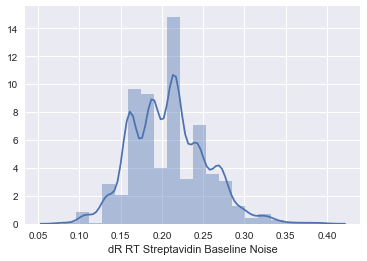

In [9]:
sns.distplot(df['dR RT Streptavidin Baseline Noise'].dropna().reset_index(drop = True) * 1000, bins = 20)

In [32]:
tmp = data[data['Peptide Length'] == 13][['Peptide', 'Peptide Length']].groupby('Peptide').agg(len)
tmp = tmp.reset_index().sort(['Peptide Length', 'Peptide']).reset_index()
tmp
#tmp[~tmp['Peptide'].str.contains('QSG')]

,index,Peptide,Peptide Length
0,9,LGQFQVWIPGAQK,4
1,10,MGQFQVWIPGAQK,4
2,11,NAQFQVWIPGAQK,4
3,12,NCQFQVWIPGAQK,4
4,13,NDQFQVWIPGAQK,4
5,14,NEQFQVWIPGAQK,4
6,15,NFQFQVWIPGAQK,4
7,16,NGAFQVWIPGAQK,4
8,17,NGCFQVWIPGAQK,4
9,18,NGDFQVWIPGAQK,4


# Calculate mean and standard deviation by peptide

In [89]:
grouped_dIm = df[ df['dIm EP Bad'] == 0 ].groupby(['Peptide'])                      
grouped_dR  = df[ df['dR EP Bad']  == 0 ].groupby(['Peptide']) 

f_dIm = {'Peptide Length'             : {'Peptide Length'          : 'first'},
         'Peptide Weight'             : {'Peptide Weight'          : 'first'},
         'dIm EP Peptide Median'      : {'dIm EP Peptide Mean'     : np.mean,
                                         'dIm EP Peptide SE'       : stats.sem,
                                         'Number of dIm EP Spots'  : len},
         'dIm EP Streptavidin Median' : {'dIm EP Streptavidin Mean' : np.mean,
                                         'dIm EP Streptavidin SE'  : stats.sem}}

f_dR  = {'dR EP Peptide Median'       : {'dR EP Peptide Mean'      : np.mean,
                                         'dR EP Peptide SE'        : stats.sem,
                                         'Number of dR EP Spots'   : len},
         'dR EP Streptavidin Median'  : {'dR EP Streptavidin Mean'  : np.mean,
                                         'dR EP Streptavidin SE'   : stats.sem}}     

result_dIm = grouped_dIm.agg(f_dIm)
result_dR  = grouped_dR.agg(f_dR)

result_dIm.columns = result_dIm.columns.droplevel()
result_dR.columns  = result_dR.columns.droplevel()

result_dIm.reset_index(inplace = True)
result_dR.reset_index(inplace = True)

result_dIm['dIm EP Streptavidin Mean NN'] = result_dIm['dIm EP Streptavidin Mean'].clip(lower = 0)
result_dIm['dIm EP Peptide Mean NN']      = result_dIm['dIm EP Peptide Mean'].clip(lower = 0)

result_dR['dR EP Streptavidin Mean NN'] = result_dR['dR EP Streptavidin Mean'].clip(lower = 0)
result_dR['dR EP Peptide Mean NN']      = result_dR['dR EP Peptide Mean'].clip(lower = 0)

result = pd.merge(result_dIm, result_dR, how = 'outer', on = 'Peptide')
result.sort(['Peptide Length', 'Peptide'], inplace = True)
result = result.reset_index(drop = True)

result = result.reindex_axis(['Peptide',
                              'Peptide Length',
                              'Peptide Weight',
                              
                              'Number of dIm EP Spots',
                              'dIm EP Peptide Mean',
                              'dIm EP Peptide Mean NN',
                              'dIm EP Peptide SE',
                              'dIm EP Streptavidin Mean',
                              'dIm EP Streptavidin Mean NN',
                              'dIm EP Streptavidin SE',
                             
                              'Number of dR EP Spots',
                              'dR EP Peptide Mean',
                              'dR EP Peptide Mean NN',
                              'dR EP Peptide SE',
                              'dR EP Streptavidin Mean',
                              'dR EP Streptavidin Mean NN',
                              'dR EP Streptavidin SE'], axis=1)

result.head()

,Peptide,Peptide Length,Peptide Weight,Number of dIm EP Spots,dIm EP Peptide Mean,dIm EP Peptide Mean NN,dIm EP Peptide SE,dIm EP Streptavidin Mean,dIm EP Streptavidin Mean NN,dIm EP Streptavidin SE,Number of dR EP Spots,dR EP Peptide Mean,dR EP Peptide Mean NN,dR EP Peptide SE,dR EP Streptavidin Mean,dR EP Streptavidin Mean NN,dR EP Streptavidin SE
0,ATHPQFAT,8,871.949,4,0.001384,0.001384,0.000084,0.001445,0.001445,0.000100,4,0.001181,0.001181,0.000018,0.000627,0.000627,0.000115
1,CTHPQFAT,8,904.009,4,0.001125,0.001125,0.000035,0.001317,0.001317,0.000129,4,0.001023,0.001023,0.000065,0.000608,0.000608,0.000100
2,DTHPQFAT,8,915.959,4,0.001391,0.001391,0.000062,0.001412,0.001412,0.000073,4,0.001054,0.001054,0.000054,0.000640,0.000640,0.000065
3,DYKDDDDK,8,1012.984,99,0.005810,0.005810,0.000087,-0.000086,0.000000,0.000009,99,0.002899,0.002899,0.000055,0.000089,0.000089,0.000014
4,ETHPQFAT,8,929.986,4,0.001740,0.001740,0.000131,0.001277,0.001277,0.000064,4,0.000894,0.000894,0.000111,0.000618,0.000618,0.000047


In [45]:
# result.to_csv('18 EP dIm and dR Signals aggregated.csv', index = False)

In [46]:
# result[result['Peptide'] == 'NCQFQVWIPGAQK'] 

In [47]:
# data[data['Peptide'] == 'NCQFQVWIPGAQK'] 

In [49]:
# data[data['dR EP Peptide MAD'] > 0.005]